In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
cmap = plt.get_cmap('winter') #cool , cooper, berlin, managua, brg, gist_rainbow, jet, turbo


labelsize_for_all=16


nameFolder = "Model3_ev"



In [2]:
import matplotlib as mpl

labelsize_for_all = 16

plt.rcParams.update({
    'font.family': 'serif',         # Tipo de letra
    'font.size': 14,                # Tamaño base
    'axes.titlesize': 16,           # Tamaño del título del gráfico
    'axes.labelsize': labelsize_for_all,           # Tamaño de los ejes
    'xtick.labelsize': labelsize_for_all,          # Tamaño de las etiquetas del eje x
    'ytick.labelsize': labelsize_for_all,          # Tamaño de las etiquetas del eje y
    'legend.fontsize': labelsize_for_all,          # Tamaño de la leyenda
    #'figure.figsize': (8, 5),       # Tamaño por defecto de las figuras
    'lines.linewidth': 2,           # Grosor de las líneas
    'grid.alpha': 0.3               # Transparencia de la grilla
})


In [3]:
Rt = 12 
pc = 4.328e-05
rhoc =  2.87e-4

In [4]:
def processFile2(nameFolder,nameFile):
    
    nameFile="TOVstar2_"+nameFolder+"/"+nameFile
    out=[]
    t_i=[]
    
    with open(nameFile, 'rb') as file:
        lines = file.readlines()

        t=0
        x_i=[]
        y_i=[]
        t_i=[]
        for l in lines:
            if len(str(l.split()))==2:
                continue
                print("here ",l)
            elif (str(l)[2]=="#"):
                if t!=0:
                    #print(x_i[0],y_i[0])
                    out.append([np.array(x_i),np.array(y_i)])
                    x_i=[]
                    y_i=[]
                t_i.append(float(l.split()[2]))
                #print (float(l.split()[2]))
                t+=1
            else:
                x_i.append(float(l.split()[0]))
                y_i.append(float(l.split()[1]))

        if len(out)==0:
            out.append([np.array(x_i),np.array(y_i)])
    #print("tiempo=",t_i,len(t_i))
    return out,t_i

In [5]:
def plot_at_time(y, t, label_time, ymin, ymax, name, title,labelloc="upper left",c="black",exp=1,central=1,
                 save=True, newfig=True,label=True):
    if newfig:
        plt.figure()
        plt.vlines(Rt, ymin, ymax, colors="gray", linestyles='dashed')
        
        plt.xlabel(r"$r\ [km]$", fontsize=labelsize_for_all)
        plt.ylabel(title, fontsize=labelsize_for_all)
        plt.xlim(0,13)
        plt.ylim(ymin, ymax)
        plt.grid()
        
                

    y1 = (np.array(y[1])/central )*exp
    
    if label:
        plt.plot(y[0], y1, '-', color=c,
             label=fr"$t = {label_time:.0f}$")        
    else:
        plt.plot(y[0], y1, '-', color=c)        
    
    if save:
        plt.legend(fancybox=True,loc=labelloc,framealpha=1.0)
        plt.savefig(f"{name}_{label_time:.0f}.pdf", bbox_inches="tight")


In [6]:
"""
nameFile="fluid_p0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$p(r)\ /\ p_c$"
ymin=0.
ymax=2.05


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             central=pc,labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 2

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             central=pc,labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             central=pc,labelloc="lower left")



"""

'\nnameFile="fluid_p0"\n\na_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")\nnumber = len(a_Ollin)\n\ncmap = plt.get_cmap(\'cool\') #cool , copper, brg, gist_rainbow, jet, turbo\n\ncolors = [cmap(i) for i in np.linspace(0, 1, number)]\n\n\n\n##### Graficas ####\nname=f"{nameFolder}_{nameFile}"\ntitle = r"$p(r)\\ /\\ p_c$"\nymin=0.\nymax=2.05\n\n\n## t=0\ni0 = 0\n\nplot_at_time(a_Ollin[i0], T[i0], T[i0],\n             ymin,ymax,name,title,c=colors[i0],\n             central=pc,labelloc="lower left")\n#y, t, label_time, ymin, ymax, name, title\n\n\n## t=mitad\nimitad = len(T) // 2\n\nplot_at_time(a_Ollin[imitad], T[imitad], T[imitad],\n             ymin,ymax,name,title,c=colors[imitad],\n             central=pc,labelloc="lower left")\n\n## t=final\nifinal = len(T) - 2\n\nplot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],\n             ymin,ymax,name,title,c=colors[ifinal],\n             central=pc,labelloc="lower left")\n\n\n\n'

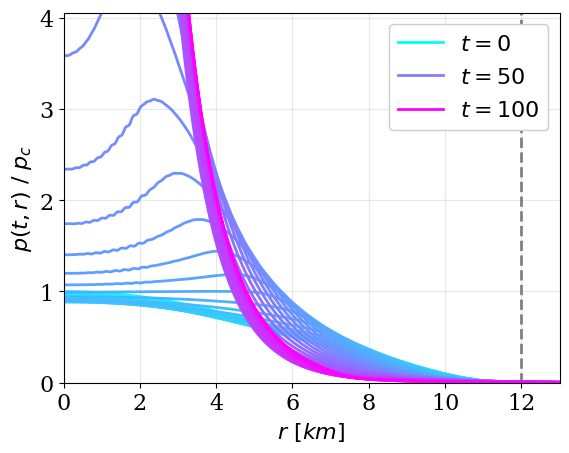

In [9]:
nameFile="fluid_p0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 41#len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$p(t,r)\ /\ p_c$"
ymin=0.
ymax=4.05


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             central=pc,labelloc="upper right",
             label=(i in label_indices),
             save=save, newfig=newfig)







In [8]:
"""
nameFile="fluid_rho0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$\rho_0(r)\ /\ \rho_{0_c}$"
ymin=0.
ymax=1.05


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             central=rhoc,labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 3

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             central=rhoc,labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             central=rhoc,labelloc="lower left")

"""



'\nnameFile="fluid_rho0"\n\na_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")\nnumber = len(a_Ollin)\n\ncmap = plt.get_cmap(\'cool\') #cool , copper, brg, gist_rainbow, jet, turbo\n\ncolors = [cmap(i) for i in np.linspace(0, 1, number)]\n\n\n\n##### Graficas ####\nname=f"{nameFolder}_{nameFile}"\ntitle = r"$\rho_0(r)\\ /\\ \rho_{0_c}$"\nymin=0.\nymax=1.05\n\n\n## t=0\ni0 = 0\n\nplot_at_time(a_Ollin[i0], T[i0], T[i0],\n             ymin,ymax,name,title,c=colors[i0],\n             central=rhoc,labelloc="lower left")\n#y, t, label_time, ymin, ymax, name, title\n\n\n## t=mitad\nimitad = len(T) // 3\n\nplot_at_time(a_Ollin[imitad], T[imitad], T[imitad],\n             ymin,ymax,name,title,c=colors[imitad],\n             central=rhoc,labelloc="lower left")\n\n## t=final\nifinal = len(T) - 2\n\nplot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],\n             ymin,ymax,name,title,c=colors[ifinal],\n             central=rhoc,labelloc="lower left")\n\n'

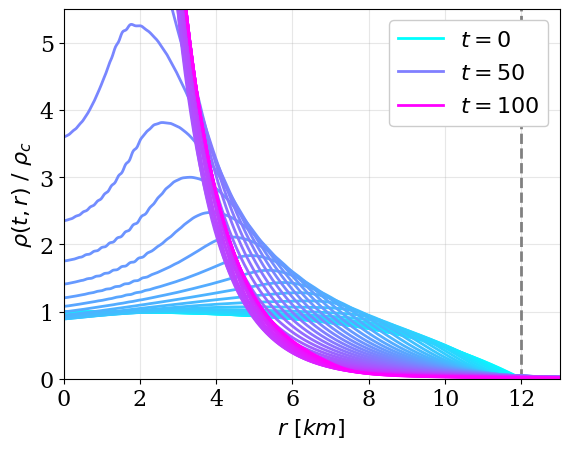

In [10]:
nameFile="fluid_rho0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 41#len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$\rho(t,r)\ /\ \rho_c$"
ymin=0.
ymax=5.5


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             central=rhoc,labelloc="upper right",
             label=(i in label_indices),
             save=save, newfig=newfig)






In [11]:
"""
nameFile="A0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$A(r)$"
ymin=0.9
ymax=1.5


## t=0
i0 = 0
plot_at_time(a_Ollin[i0], T[i0], T[i0],ymin,ymax,name,title,c=colors[i0])
#y, t, label_time, ymin, ymax, name, title

## t=0
imitad = len(T) // 3
plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],ymin,ymax,name,title,c=colors[imitad])

## t=final
print(len(T),len(a_Ollin))
ifinal = len(T) - 2
plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],ymin,ymax,name,title,c=colors[ifinal])



"""

'\nnameFile="A0"\n\na_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")\nnumber = len(a_Ollin)\n\ncmap = plt.get_cmap(\'cool\') #cool , copper, brg, gist_rainbow, jet, turbo\n\ncolors = [cmap(i) for i in np.linspace(0, 1, number)]\n\n\n\n##### Graficas ####\nname=f"{nameFolder}_{nameFile}"\ntitle = r"$A(r)$"\nymin=0.9\nymax=1.5\n\n\n## t=0\ni0 = 0\nplot_at_time(a_Ollin[i0], T[i0], T[i0],ymin,ymax,name,title,c=colors[i0])\n#y, t, label_time, ymin, ymax, name, title\n\n## t=0\nimitad = len(T) // 3\nplot_at_time(a_Ollin[imitad], T[imitad], T[imitad],ymin,ymax,name,title,c=colors[imitad])\n\n## t=final\nprint(len(T),len(a_Ollin))\nifinal = len(T) - 2\nplot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],ymin,ymax,name,title,c=colors[ifinal])\n\n\n\n'

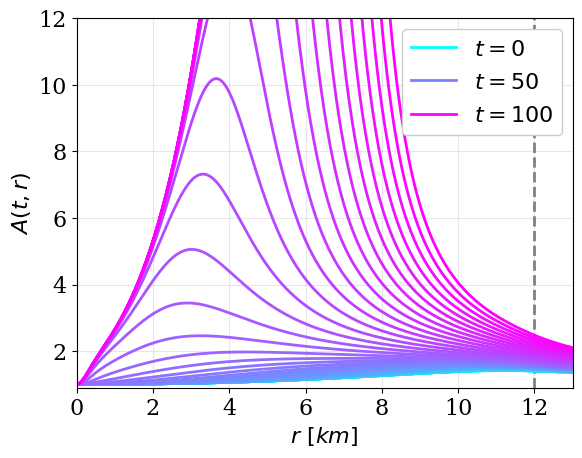

In [12]:
nameFile="A0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 41#len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$A(t,r)$"
ymin=0.9
ymax=12


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             labelloc="upper right",
             label=(i in label_indices),
             save=save, newfig=newfig)






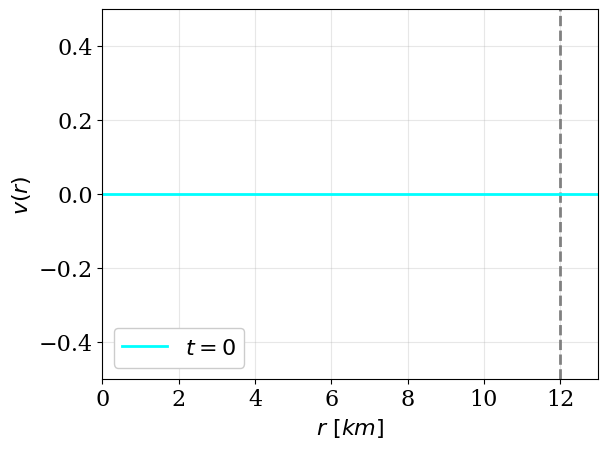

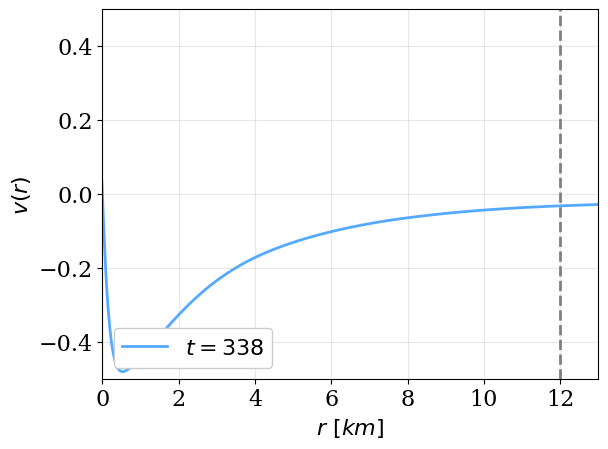

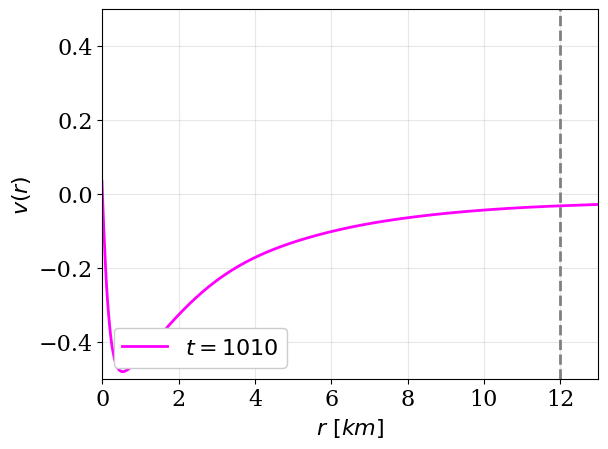

In [37]:
nameFile="fluid_v0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$v(r)$"
ymin=-0.5
ymax=0.5


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 3

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             labelloc="lower left")





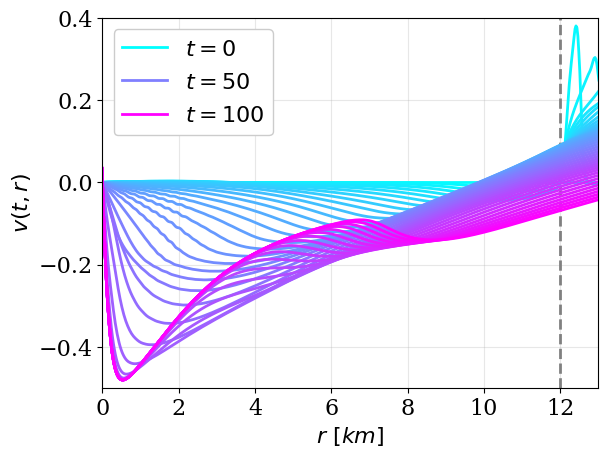

In [16]:
nameFile="fluid_v0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 41#len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$v(t,r)$"
ymin=-0.5
ymax=0.4


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             labelloc="upper left",
             label=(i in label_indices),
             save=save, newfig=newfig)






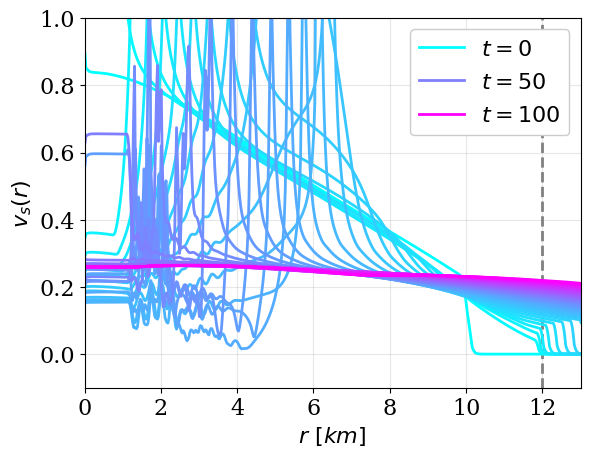

In [18]:
nameFile="fluid_vs0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 41#len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$v_s(r)$"
ymin=-0.1
ymax=1


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             labelloc="upper right",
             label=(i in label_indices),
             save=save, newfig=newfig)






In [19]:
"""
nameFile="fluid_vs0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$v_{s}(r)$"
ymin=-0.1
ymax=1.1


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             labelloc="lower left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 3

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             labelloc="lower left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             labelloc="lower left")

"""



'\nnameFile="fluid_vs0"\n\na_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")\nnumber = len(a_Ollin)\n\ncmap = plt.get_cmap(\'cool\') #cool , copper, brg, gist_rainbow, jet, turbo\n\ncolors = [cmap(i) for i in np.linspace(0, 1, number)]\n\n\n\n##### Graficas ####\nname=f"{nameFolder}_{nameFile}"\ntitle = r"$v_{s}(r)$"\nymin=-0.1\nymax=1.1\n\n\n## t=0\ni0 = 0\n\nplot_at_time(a_Ollin[i0], T[i0], T[i0],\n             ymin,ymax,name,title,c=colors[i0],\n             labelloc="lower left")\n#y, t, label_time, ymin, ymax, name, title\n\n\n## t=mitad\nimitad = len(T) // 3\n\nplot_at_time(a_Ollin[imitad], T[imitad], T[imitad],\n             ymin,ymax,name,title,c=colors[imitad],\n             labelloc="lower left")\n\n## t=final\nifinal = len(T) - 2\n\nplot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],\n             ymin,ymax,name,title,c=colors[ifinal],\n             labelloc="lower left")\n\n'

In [20]:
"""
nameFile="alpha0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$\alpha(r)$"
ymin=0.7
ymax=0.9


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             labelloc="upper left")
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 3

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             labelloc="upper left")

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             labelloc="upper left")

"""



'\nnameFile="alpha0"\n\na_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")\nnumber = len(a_Ollin)\n\ncmap = plt.get_cmap(\'cool\') #cool , copper, brg, gist_rainbow, jet, turbo\n\ncolors = [cmap(i) for i in np.linspace(0, 1, number)]\n\n\n\n##### Graficas ####\nname=f"{nameFolder}_{nameFile}"\ntitle = r"$\x07lpha(r)$"\nymin=0.7\nymax=0.9\n\n\n## t=0\ni0 = 0\n\nplot_at_time(a_Ollin[i0], T[i0], T[i0],\n             ymin,ymax,name,title,c=colors[i0],\n             labelloc="upper left")\n#y, t, label_time, ymin, ymax, name, title\n\n\n## t=mitad\nimitad = len(T) // 3\n\nplot_at_time(a_Ollin[imitad], T[imitad], T[imitad],\n             ymin,ymax,name,title,c=colors[imitad],\n             labelloc="upper left")\n\n## t=final\nifinal = len(T) - 2\n\nplot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],\n             ymin,ymax,name,title,c=colors[ifinal],\n             labelloc="upper left")\n\n'

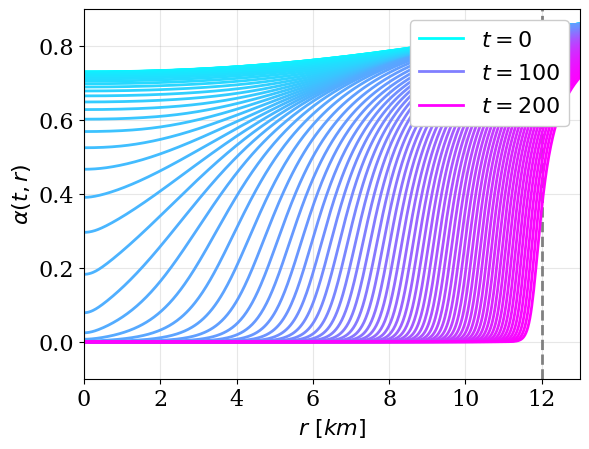

In [35]:
nameFile="alpha0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 81 #len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$\alpha(t,r)$"
ymin=-0.1
ymax=0.9


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             labelloc="upper right",
             label=(i in label_indices),
             save=save, newfig=newfig)






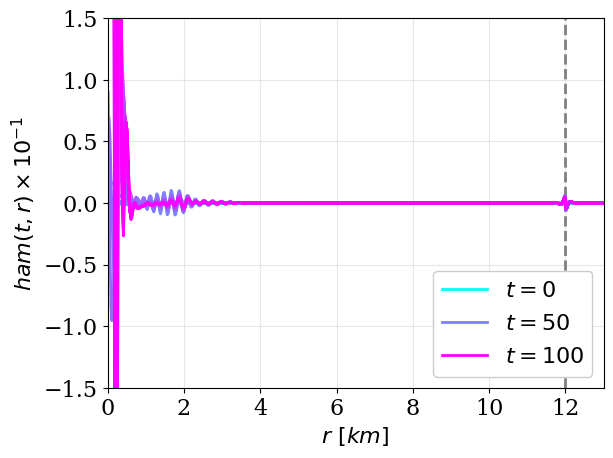

In [26]:
nameFile="ham0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = 41#len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$ham(t,r)\times 10^{-1}$"
ymin=-1.5
ymax=1.5
exp=1e1


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             labelloc="lower right",
             exp = exp,
             label=(i in label_indices),
             save=save, newfig=newfig)


In [27]:
"""
nameFile="ham0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}"
title = r"$ham(r)\times 10^{-3}$"
exp=1e3
ymin=-4
ymax=8


## t=0
i0 = 0

plot_at_time(a_Ollin[i0], T[i0], T[i0],
             ymin,ymax,name,title,c=colors[i0],
             labelloc="upper left",exp=exp)
#y, t, label_time, ymin, ymax, name, title


## t=mitad
imitad = len(T) // 3

plot_at_time(a_Ollin[imitad], T[imitad], T[imitad],
             ymin,ymax,name,title,c=colors[imitad],
             labelloc="upper left",exp=exp)

## t=final
ifinal = len(T) - 2

plot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],
             ymin,ymax,name,title,c=colors[ifinal],
             labelloc="upper left",exp=exp)

"""



'\nnameFile="ham0"\n\na_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")\nnumber = len(a_Ollin)\n\ncmap = plt.get_cmap(\'cool\') #cool , copper, brg, gist_rainbow, jet, turbo\n\ncolors = [cmap(i) for i in np.linspace(0, 1, number)]\n\n\n\n##### Graficas ####\nname=f"{nameFolder}_{nameFile}"\ntitle = r"$ham(r)\times 10^{-3}$"\nexp=1e3\nymin=-4\nymax=8\n\n\n## t=0\ni0 = 0\n\nplot_at_time(a_Ollin[i0], T[i0], T[i0],\n             ymin,ymax,name,title,c=colors[i0],\n             labelloc="upper left",exp=exp)\n#y, t, label_time, ymin, ymax, name, title\n\n\n## t=mitad\nimitad = len(T) // 3\n\nplot_at_time(a_Ollin[imitad], T[imitad], T[imitad],\n             ymin,ymax,name,title,c=colors[imitad],\n             labelloc="upper left",exp=exp)\n\n## t=final\nifinal = len(T) - 2\n\nplot_at_time(a_Ollin[ifinal], T[ifinal], T[ifinal],\n             ymin,ymax,name,title,c=colors[ifinal],\n             labelloc="upper left",exp=exp)\n\n'

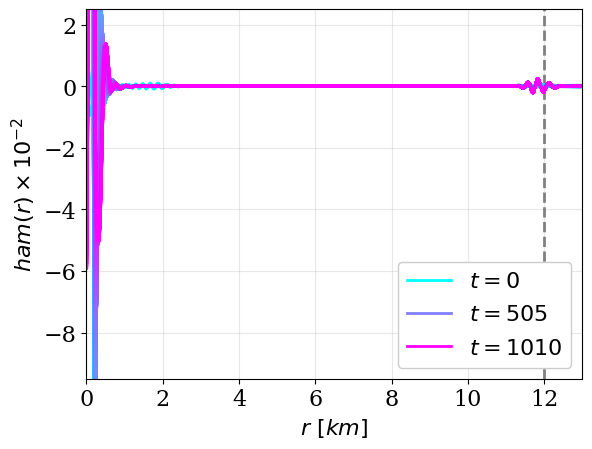

In [29]:
nameFile="ham0"

a_Ollin,T=processFile2(nameFolder,f"{nameFile}.rl")
number = len(a_Ollin)

cmap = plt.get_cmap('cool') #cool , copper, brg, gist_rainbow, jet, turbo

colors = [cmap(i) for i in np.linspace(0, 1, number)]



##### Graficas ####
name=f"{nameFolder}_{nameFile}_all"
title = r"$ham(r)\times10^{-2}$"
exp=1e1
ymin=-9.5
ymax=2.5


## t=0
i0 = 0
label_indices = {0, number // 2, number - 1}

for i in range(number):
    save   = (i == number - 1)
    newfig = (i == 0)
    plot_at_time(a_Ollin[i], T[i], T[i],
             ymin,ymax,name,title,c=colors[i],
             exp=exp,labelloc="lower right",
             label=(i in label_indices),
             save=save, newfig=newfig)






In [30]:
def processFile_tl(nameFolder,nameFile):
    
    nameFile="TOVstar2_"+nameFolder+"/"+nameFile
    out=[]
    
    with open(nameFile, 'rb') as file:
        lines = file.readlines()
        #print(lines)
        
        r=[]
        var=[]
        for l in lines[1:]:
            #print(l.split()[0])
            r_i=float(l.split()[0])
            var_i=float(l.split()[1])
            r.append(r_i)
            var.append(var_i)
            #print(var_i)
        out = [r,var]
            
                    
    return out

In [94]:
def plot_tl(data,xmax,ymax,ymin,title,name,xmin=0,save=True):
    
    
    plt.plot(data[0], data[1],'.',color="purple")

    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    plt.grid(True)

    plt.xlabel("t",fontsize=labelsize_for_all)
    plt.ylabel(title,fontsize=labelsize_for_all)
    
    if save:
        plt.savefig(f"{name}.pdf", bbox_inches="tight")
        
    

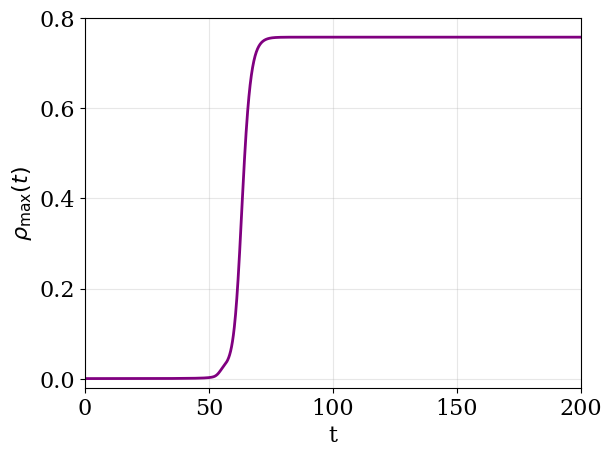

In [92]:
nameFile="fluid_rho0_max"

a_Ollin=processFile_tl(nameFolder,f"{nameFile}.tl")
number = len(a_Ollin)

name=f"{nameFolder}_{nameFile}_all"
xmax=200
ymax=0.8
ymin=-0.02
title=r"$\rho_{\max}(t)$"

plot_tl(a_Ollin,xmax,ymax,ymin,title,name)

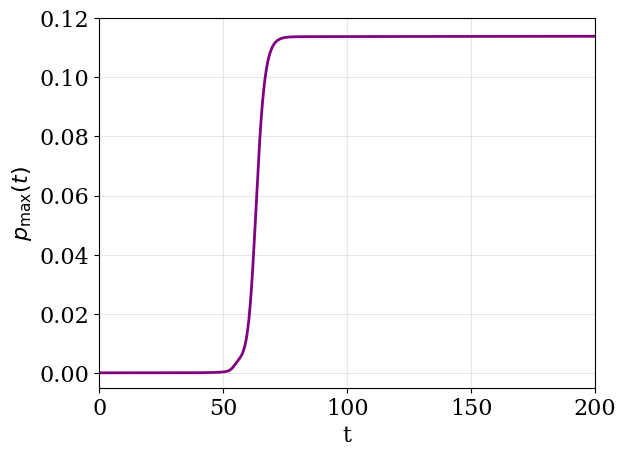

In [93]:
nameFile="fluid_p0_max"

a_Ollin=processFile_tl(nameFolder,f"{nameFile}.tl")
number = len(a_Ollin)

name=f"{nameFolder}_{nameFile}_all"
xmax=200
ymax=0.12
ymin=-0.005
title=r"$p_{\max}(t)$"

plot_tl(a_Ollin,xmax,ymax,ymin,title,name)

100.0 7.522811


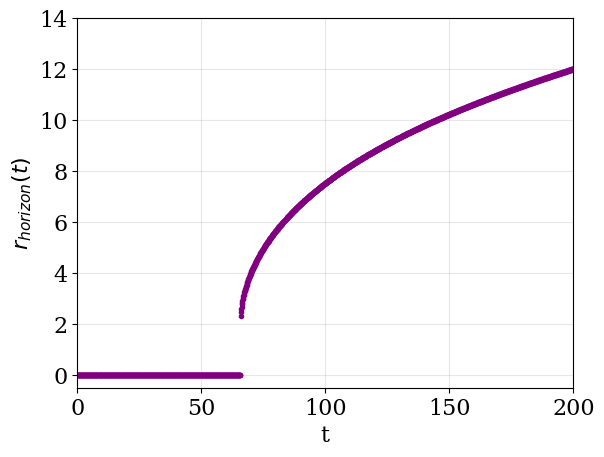

In [95]:
nameFile="ah_rad0"

a_Ollin=processFile_tl(nameFolder,f"{nameFile}.tl")
number = len(a_Ollin)

name=f"{nameFolder}_{nameFile}_all"
xmax=200
ymax=14
ymin=-0.5
title=r"$r_{{horizon}}(t)$"

plot_tl(a_Ollin,xmax,ymax,ymin,title,name)

nn= 800
print(a_Ollin[0][nn],a_Ollin[1][nn])

In [74]:
nameFile="ah_rad0"

a_Ollin=processFile_tl(nameFolder,f"{nameFile}.tl")

nn= 527
print(a_Ollin[0][nn])
print(a_Ollin[1][nn])

65.875
2.318327


In [99]:
nameFile="ah_rad0"

a_Ollin=processFile_tl(nameFolder,f"{nameFile}.tl")

nn= 527
print(a_Ollin[0][-1])
print(a_Ollin[1][-1])

print(len(a_Ollin[0]))

1014.125
23.4834
8114


In [17]:
def Rt(r, rho, rho_tol):
    
    for ri, rhoi in zip(r, rho):
        if rhoi < rho_tol:
            return ri
    return r[-1]  


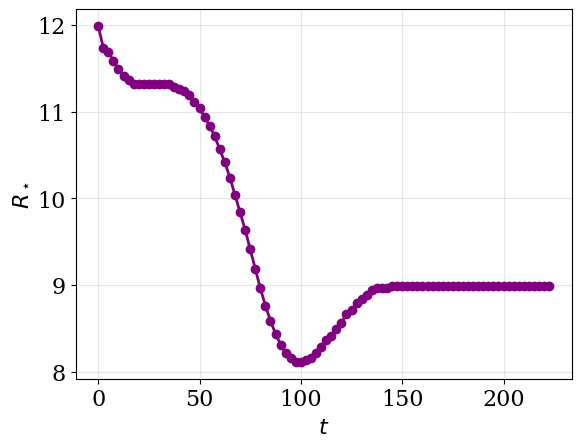

In [18]:
nameFile = "fluid_rho0"

a_Ollin, T = processFile2(nameFolder, f"{nameFile}.rl")
number = 90

rho_tol = 1e-2  # porque estas graficando rho / rho_c

Rt_array = []   # radio estelar vs tiempo
time = []


for i in range(number):

    r   = a_Ollin[i][0]
    rho = np.array(a_Ollin[i][1]) / rhoc  
    
    #if np.max(rho)>10:
    #    rho_tol =1e-2
    if i>0:
        rho_tol =7e-2

    Rt_i = Rt(r, rho, rho_tol)
    Rt_array.append(Rt_i)
    time.append(T[i])


plt.figure()
plt.plot(time, Rt_array, "-o",color="purple")
plt.xlabel(r"$t$")
plt.ylabel(r"$R_\star$")

#plt.ylim(7,13)
plt.grid()

name=f"{nameFolder}_RadiusStelar"
plt.savefig(f"{name}.pdf", bbox_inches="tight")

plt.show()
